In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1> Visualization Using Seaborn </h1>

<h1> DENGUE CASES TREND FROM 2016 - 2020 </h1>

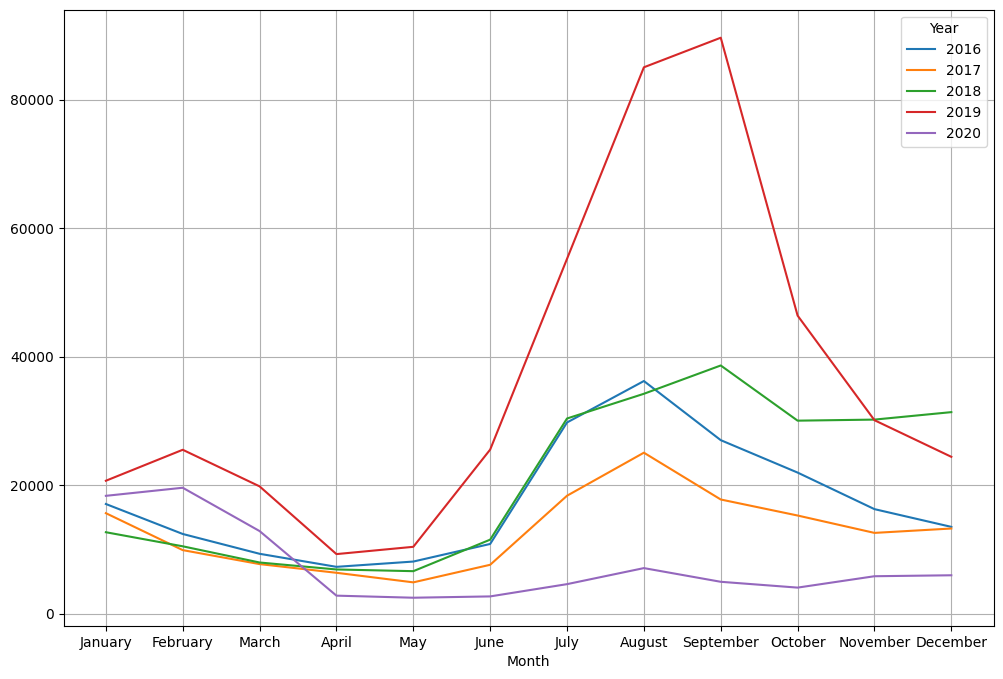

In [7]:
#list
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby(["Month", "Year"])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


<h1> LINE PLOT WITH SEABORN </h1>

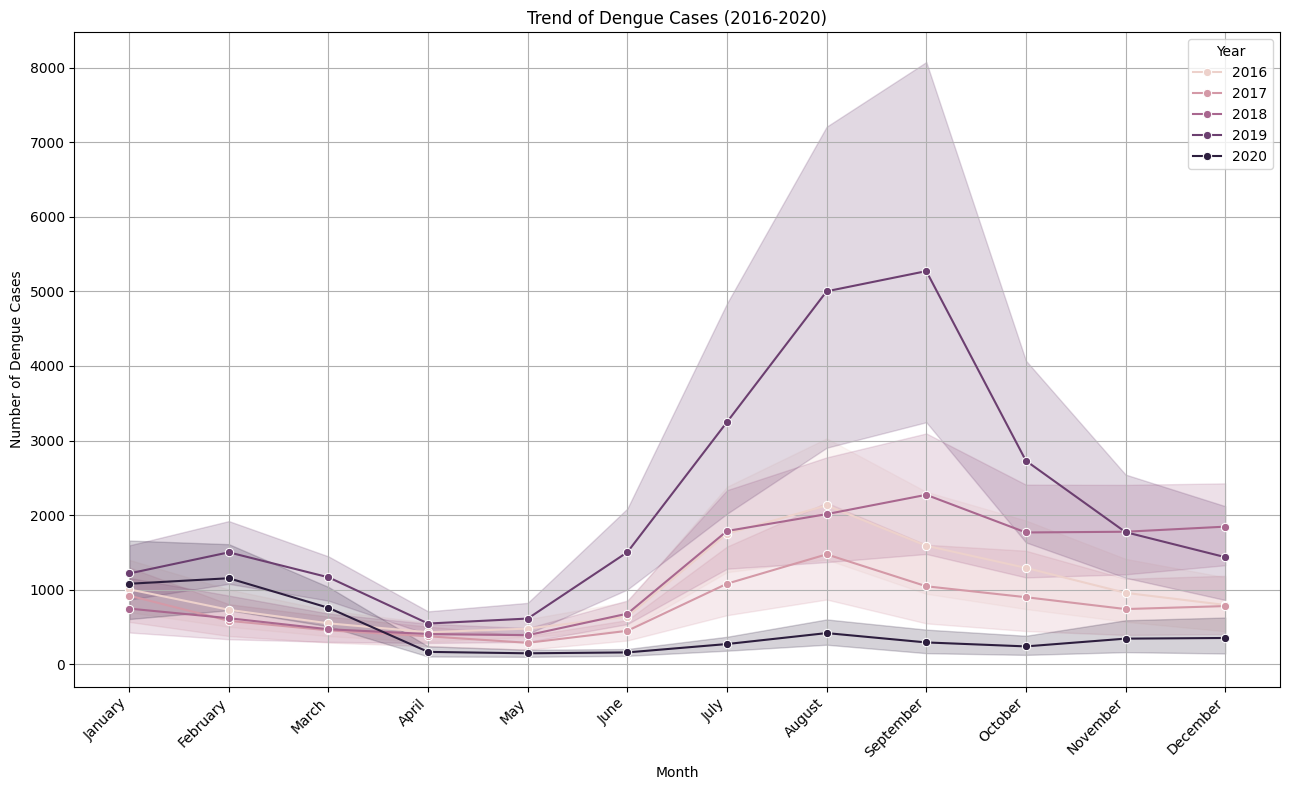

In [8]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
sns.lineplot(data = dengue, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(13,8)
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h3> Insight </h3>
<p>In 2016, the Dengvaxia vaccine was introduced as part of the country's dengue prevention efforts.5
Unfortunately, nearly two years after the campaign started, Sanofi, the vaccine developer, announced that Dengvaxia might cause ‘more severe disease’ in those who have not had previous dengue infection. By this time, over 800,000 children had been indiscriminately inoculated, and public outrage ensued, with lawsuits filed against Sanofi and various government officials due to claims of children's deaths from the vaccine and government corruption. The resulting mistrust against the public health sector plunged immunization rates, precipitating a measles outbreak in 2019. </p>

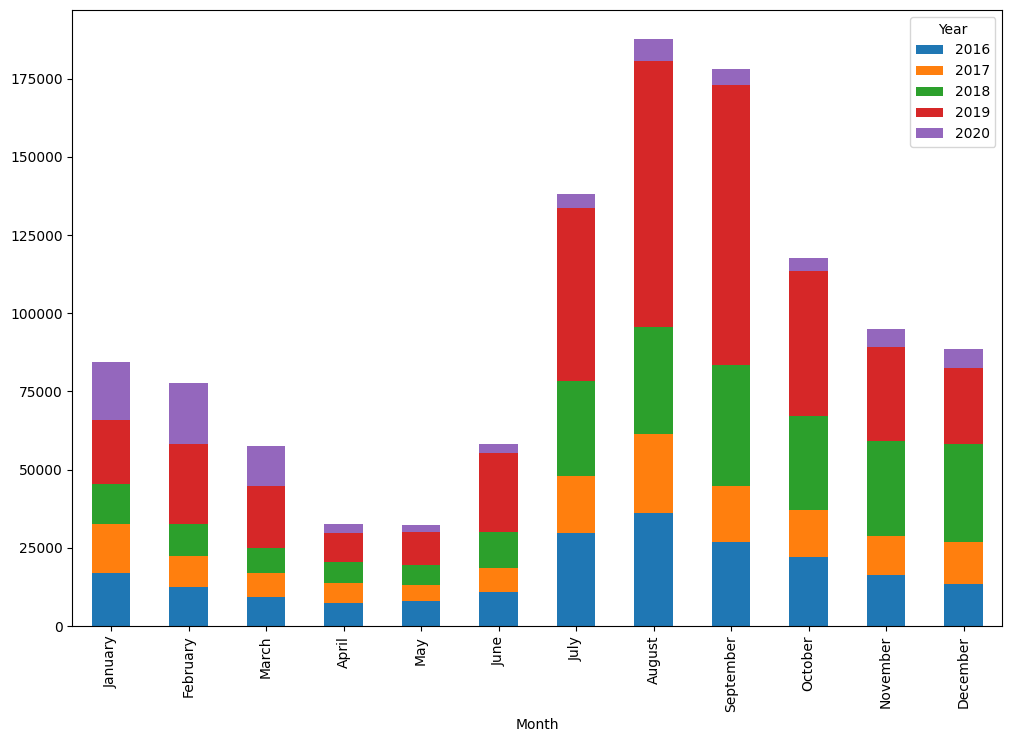

In [9]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h1>Scatterplot </h1>

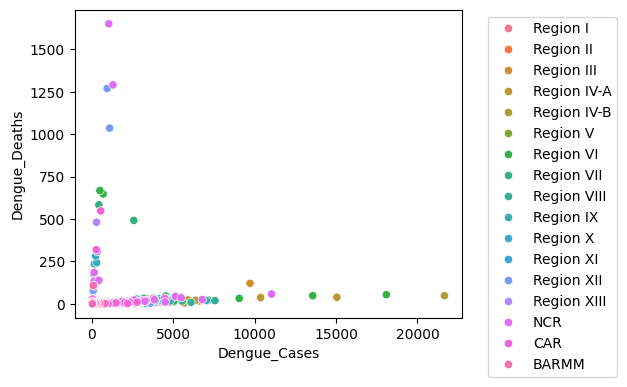

In [10]:
sns.scatterplot(data=dengue, x="Dengue_Cases", y="Dengue_Deaths", hue="Region")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gcf().set_size_inches(5,4)
plt.show()

<h1> ANALYSIS OF DENGUE CASES PER REGION </h1>

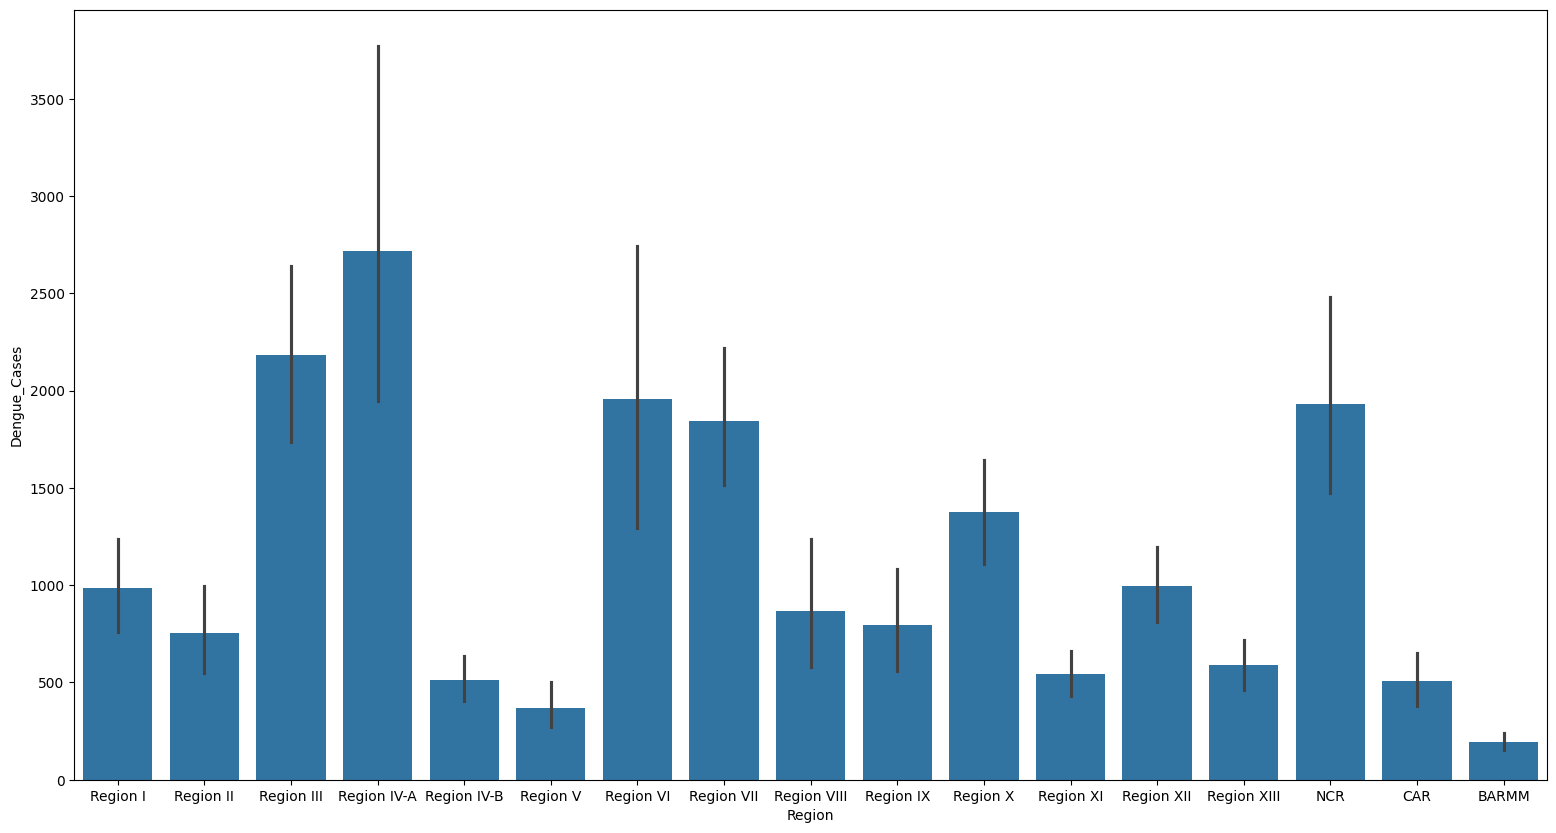

In [11]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

<h2> Insight </h2>
<p> The highest case was the most densely populated regions in the country specially the NCR, REGION III, and REGION IVA - CALABARZON region </p>

<h1> Mortality Rate per each Region </h1>

In [12]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [13]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [14]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [15]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


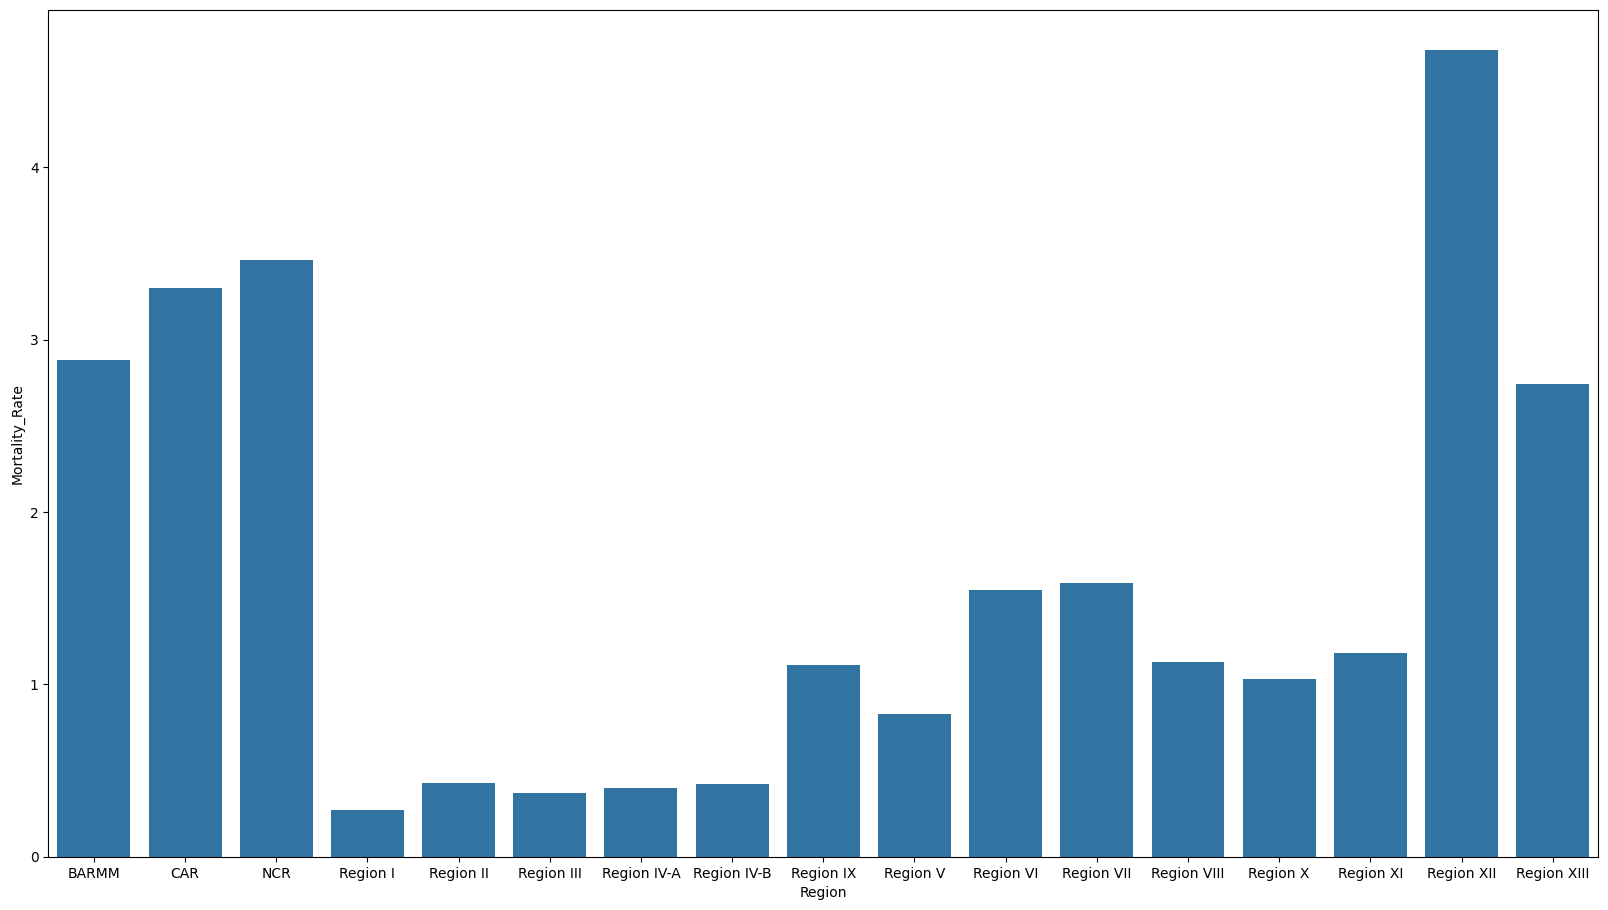

In [16]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

<h3> Insight </h3>
<p> The DOH 7 reported that as of August 13, Region 7 has 11,403 confirmed dengue cases with 72 deaths. The DOH 7 said that 74 percent of the total number of confirmed dengue cases is in Cebu island. Cebu province has 4,457 cases with 27 mortalities.</p>

<h1> Mortality per Region thru Heat Map </h1>

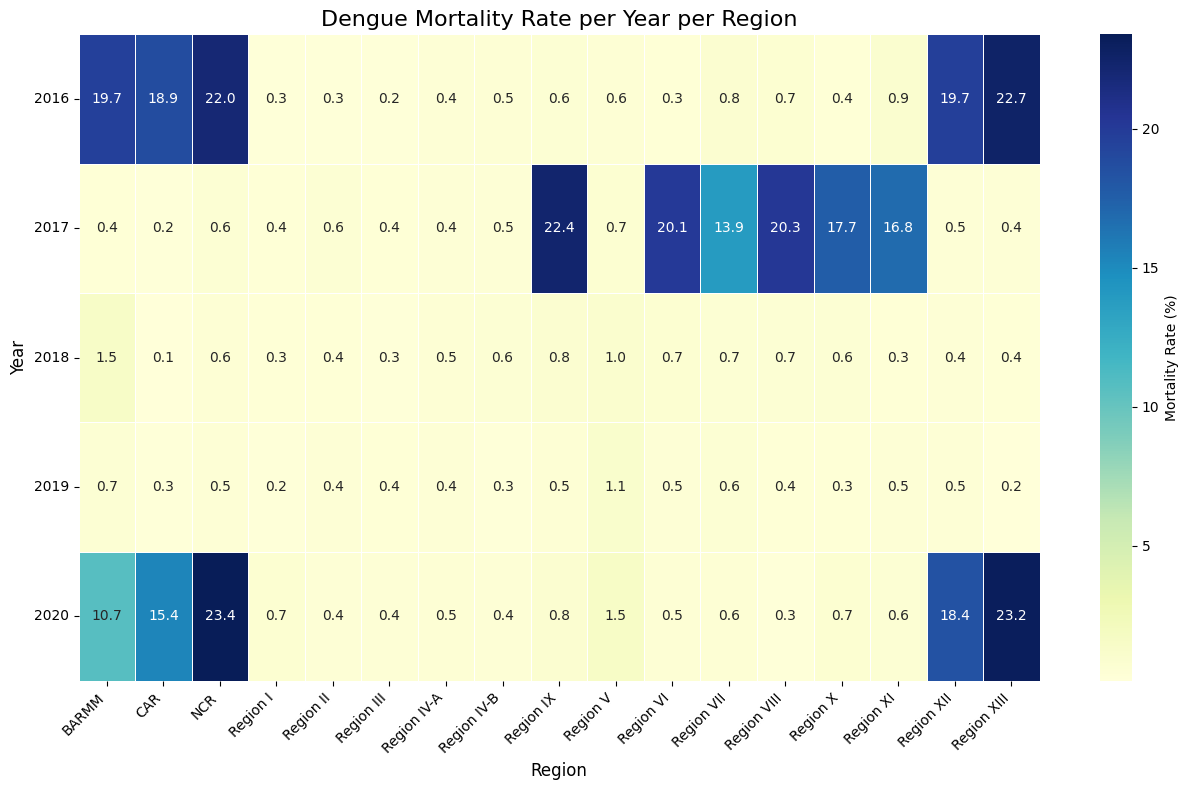

In [17]:

dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

# Group by Year and Region and calculate the mean mortality rate
heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()

# Create the heatmap

sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.gcf().set_size_inches(13, 8)
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h2> Insight </h2><br>
<p> The graph showed an alarming motality rate of dengue cases and deaths from 2016 to 2020, and upon closer examination the visualization clearly indicate a high mortality in NCR during 2016, and also in the BARMM Region with 11 percent death rate. On 2017, regions 6,7,8,9,10 and 11 indicate a high mmortality rate during that yar. </p>

<h1> REGION IV 4A - DENGUE CASES </h1>

In [18]:
region4 = dengue[dengue['Region'] == "Region IV-A"]

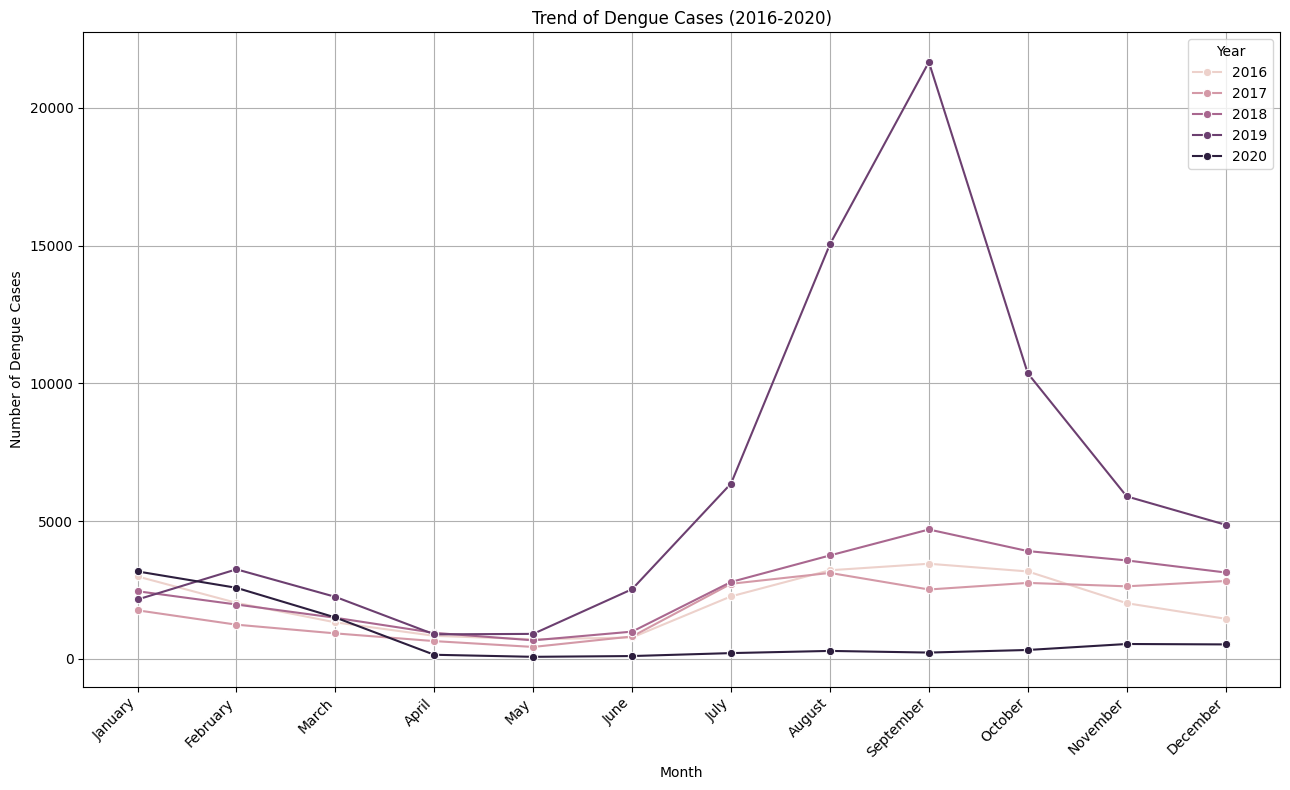

In [19]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)



# Create the line plot
sns.lineplot(data = region4, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(13,8)
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1> PREDICTIVES </h1>

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your dataset is stored in a DataFrame called df
# Convert Year to numeric if it's currently stored as datetime
# df['Year'] = df['Year'].dt.year

# Check the data types of your features
print(dengue.dtypes)

# Convert Dengue_Cases to numeric if it's not already
# df['Dengue_Cases'] = pd.to_numeric(df['Dengue_Cases'])

dengue['Year'] = pd.to_numeric(dengue['Year'])
dengue['Dengue_Cases'] = pd.to_numeric(dengue['Dengue_Cases'])
# Split the data into features (X) and target variable (y)
X = dengue['Year'].values.reshape(-1, 1)
y = dengue['Dengue_Cases'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dengue['Year'] = pd.to_datetime(dengue['Year'], format='%Y')
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Make a prediction for a new year
new_year = 2025
new_cases = model.predict([[new_year]])
print("Predicted number of dengue cases in", new_year, ":", new_cases[0])


ModuleNotFoundError: No module named 'sklearn'

In [ ]:

plt.scatter(X_train, y_train, color='blue', label='Training Data')


plt.scatter(X_test, y_test, color='red', label='Test Data')


plt.plot(X_test, y_pred, color='green', linewidth=3, label='Regression Line')


plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.title('Linear Regression of Dengue Cases Over Time')
plt.legend()

# Show plot
plt.gcf().set_size_inches(20,11)
plt.show()


In [ ]:
dengue['Year'] = pd.to_datetime(dengue['Year'], format='%Y')

In [ ]:
dengue_NCR = dengue.groupby([{dengue[dengue["Region"]=="NCR"],["Dengue_Deaths"]}]).sum()

In [ ]:
dengue_NCR = dengue[dengue["Region"]=="NCR"].groupby("Region")["Dengue_Cases"].sum()

In [ ]:
dengue_NCR

In [ ]:
dengue["Region"]=="NCR"

In [ ]:
dengue

In [ ]:
dengue_NCR_2016 = dengue[(dengue["Region"]=="NCR") & (dengue["Year"]=="2016")]["Dengue_Cases"].sum()


In [ ]:
dengue_NCR_2016

In [ ]:
dengue["Year"] == "2016"